In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RepeatedKFold, learning_curve
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
import seaborn as sns
sns.set_palette('husl')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/NEWEST_Dataset')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2780 entries, 0 to 2779
Data columns (total 85 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        2780 non-null   int64  
 1   California                        2780 non-null   float64
 2   Texas                             2780 non-null   float64
 3   Wisconsin                         2780 non-null   float64
 4   CA_1                              2780 non-null   float64
 5   CA_2                              2780 non-null   float64
 6   CA_3                              2780 non-null   float64
 7   CA_4                              2780 non-null   float64
 8   TX_1                              2780 non-null   float64
 9   TX_2                              2780 non-null   float64
 10  TX_3                              2780 non-null   float64
 11  WI_1                              2780 non-null   float64
 12  WI_2  

In [36]:
df.head()

,California,Texas,Wisconsin,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,...,average_visitors_same_day_yj,number_stores_visited_weekly,other_stores_avg_visitors_weekly,most_visited_store_same_week,average_visitors_same_week_yj,population,employed,unemployed,unemployment_rate,sold
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.75,233,7.742210,build a bear workshop,18.84375,649528.517241,280312.706897,37189.137931,13.425345,11308
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.00,173,6.135069,einstein brothers,20.00000,79247.388889,39458.319444,3316.180556,8.463889,11553
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,45.00,308,8.138411,sunglass hut,50.00000,100962.299213,45413.779528,3816.582677,7.497480,8261
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,45.00,308,8.138411,sunglass hut,50.00000,100962.299213,45413.779528,3816.582677,7.497480,7065
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,45.00,308,8.138411,sunglass hut,50.00000,100962.299213,45413.779528,3816.582677,7.497480,10520


In [39]:
df.drop(columns=['year', 'quarter',
       'month', 'week', 'day',],inplace=True)

In [40]:
X = df.drop(['sold'], axis=1)
y = df['sold']
#print(X.head())
print(X.shape)
#print(y.head())
print(y.shape)

(2780, 78)
(2780,)


In [41]:
X=X._get_numeric_data()

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=50)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2085, 75)
(2085,)
(695, 75)
(695,)


In [ ]:
y_train.value_counts() / len(y_train) * 100


28019    0.143885
27949    0.095923
14820    0.095923
14948    0.095923
13959    0.095923
           ...   
26806    0.047962
15408    0.047962
32597    0.047962
24080    0.047962
20102    0.047962
Name: sold, Length: 1998, dtype: float64

In [ ]:
y_test.value_counts() / len(y_test) * 100

16567    0.287770
24840    0.287770
20246    0.287770
21033    0.287770
25412    0.287770
           ...   
24299    0.143885
26134    0.143885
23886    0.143885
10862    0.143885
25315    0.143885
Name: sold, Length: 688, dtype: float64

In [8]:
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, n_jobs=None, 
                        train_sizes=np.linspace(0.1, 1.0, 5)):
   
    if axes is None:
        _, axes = plt.subplots(1, 1)

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator, X, y,
        cv=cv,
        scoring='r2', 
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes.legend(loc="best")
    return plt

In [ ]:
from sklearn.pipeline import make_pipeline

model = make_pipeline(MinMaxScaler(), DecisionTreeRegressor())


In [ ]:
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=50)

In [ ]:
# create the grid of hyper parameters
params = {
    "decisiontreeregressor__min_samples_split": [10, 20, 40],
    "decisiontreeregressor__max_depth": [2, 6, 8],
    "decisiontreeregressor__min_samples_leaf": [20, 40, 100],
    "decisiontreeregressor__max_leaf_nodes": [5, 20, 100],
}

# define the cross validation using RepeatedKFold (10 folds 10 repeats)


# define the grid search CV 
clf = GridSearchCV(estimator=model, param_grid=params, cv=cv)

# start training
clf.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=50),
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__max_depth': [2, 6, 8],
                         'decisiontreeregressor__max_leaf_nodes': [5, 20, 100],
                         'decisiontreeregressor__min_samples_leaf': [20, 40,
                                                                     100],
                         'decisiontreeregressor__min_samples_split': [10, 20,
                                                                      40]})

In [ ]:
best_model = clf.best_estimator_
best_model

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=8, max_leaf_nodes=100,
                                       min_samples_leaf=20,
                                       min_samples_split=10))])

In [ ]:
print("Accuracy of the tuned model: %.4f" %clf.best_score_)
print(clf.best_params_)

Accuracy of the tuned model: 0.8745
{'decisiontreeregressor__max_depth': 8, 'decisiontreeregressor__max_leaf_nodes': 100, 'decisiontreeregressor__min_samples_leaf': 20, 'decisiontreeregressor__min_samples_split': 10}


In [34]:
# define the cross validation using RepeatedKFold (10 folds 10 repeats)
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=50)

In [ ]:
params = {
  'decisiontreeregressor__criterion': ['squared_error',
  'friedman_mse', 'absolute_error', 'poisson'],
  'decisiontreeregressor__splitter': ['best','random'],
  'decisiontreeregressor__max_depth': [10, 20, 30, 40, 50, 100,
  150],
  'decisiontreeregressor__max_features': ['auto', 'sqrt', 'log2'],
  }


# define the cross validation using RepeatedKFold (10 folds 10 repeats)
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=50)

# define the grid search CV 
clf = GridSearchCV(estimator=model, param_grid=params, cv=cv)

# start training
clf.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=50),
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__criterion': ['squared_error',
                                                              'friedman_mse',
                                                              'absolute_error',
                                                              'poisson'],
                         'decisiontreeregressor__max_depth': [10, 20, 30, 40,
                                                              50, 100, 150],
                         'decisiontreeregressor__max_features': ['auto', 'sqrt',
                                                                 'log2'],
                         'decisiontreeregressor__splitter': ['best', 'random']})

In [ ]:
best_model = clf.best_estimator_
best_model

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=10,
                                       max_features='auto'))])

In [ ]:
print("Accuracy of the tuned model: %.4f" %clf.best_score_)
print(clf.best_params_)

Accuracy of the tuned model: 0.8933
{'decisiontreeregressor__criterion': 'absolute_error', 'decisiontreeregressor__max_depth': 10, 'decisiontreeregressor__max_features': 'auto', 'decisiontreeregressor__splitter': 'best'}


In [ ]:
# Train Decision Tree Regressor
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", r2_score(y_test, y_pred))

Accuracy: 0.8564065115611599


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

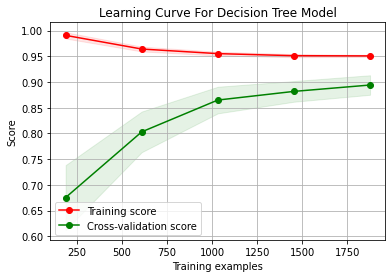

In [ ]:
plot_learning_curve(best_model, "Learning Curve For Decision Tree Model", X_train, y_train, 
                    axes=None, ylim=None, cv=cv, n_jobs=4)

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
model_2 = make_pipeline(MinMaxScaler(), GradientBoostingRegressor())

In [ ]:
params={
'gradientboostingregressor__n_estimators': [10, 50, 100, 150,
200],
'gradientboostingregressor__loss': ['squared_error', 'huber',
'quantile'],
'gradientboostingregressor__criterion': ['friedman_mse',
'squared_error']
}

In [ ]:
# define the cross validation using RepeatedKFold (10 folds 10 repeats)
cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=50)

# define the grid search CV 
clf_2= GridSearchCV(estimator=model_2, param_grid=params, cv=cv)

# start training
clf_2.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=50),
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor())]),
             param_grid={'gradientboostingregressor__criterion': ['friedman_mse',
                                                                  'squared_error'],
                         'gradientboostingregressor__loss': ['squared_error',
                                                             'huber',
                                                             'quantile'],
                         'gradientboostingregressor__n_estimators': [10, 50,
                                                                     100, 150,
                                                                     200]})

In [ ]:
best_model = clf_2.best_estimator_
best_model

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(loss='huber', n_estimators=200))])

In [ ]:
print("Accuracy of the tuned model: %.4f" %clf_2.best_score_)
print(clf_2.best_params_)

Accuracy of the tuned model: 0.9197
{'gradientboostingregressor__criterion': 'friedman_mse', 'gradientboostingregressor__loss': 'huber', 'gradientboostingregressor__n_estimators': 200}


In [ ]:
# Train Decision Tree Regressor
clf_2 = clf_2.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf_2.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", r2_score(y_test, y_pred))

Accuracy: 0.9033014417330727


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

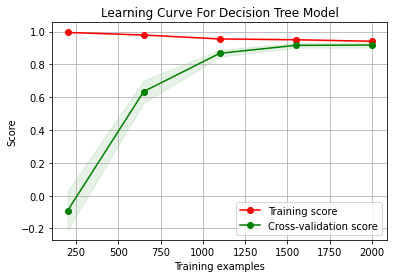

In [ ]:
plot_learning_curve(best_model, "Learning Curve For Decision Tree Model", X_train, y_train, 
                    axes=None, ylim=None, cv=cv, n_jobs=4)

In [ ]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [ ]:
from sklearn.linear_model import LinearRegression
# Train model
lr = LinearRegression().fit(X_train, y_train)
# get cross val scores
get_cv_scores(lr)

CV Mean:  0.8247862268707042
STD:  0.012991513691012833




In [ ]:
from sklearn.linear_model import Ridge
# Train model with default alpha=1
ridge = Ridge(alpha=1).fit(X_train, y_train)
# get cross val scores
get_cv_scores(ridge)

CV Mean:  0.8187004773627168
STD:  0.011836614558360293




In [ ]:

cv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=50)

In [ ]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(alpha=alpha)
grid = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', verbose=0,cv=cv)
grid_resultrd = grid.fit(X_train, y_train)
print('Best Score: ', grid_resultrd.best_score_)
print('Best Params: ', grid_resultrd.best_params_)

In [ ]:
from sklearn.linear_model import Lasso
# Train model with default alpha=1
lasso = Lasso(alpha=1).fit(X_train, y_train)
# get cross val scores
get_cv_scores(lasso)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.182e+10, tolerance: 1.383e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.221e+09, tolerance: 1.062e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

CV Mean:  0.8184181684284729
STD:  0.012226525260857966




/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.444e+09, tolerance: 1.134e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.453e+09, tolerance: 1.135e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
from sklearn.pipeline import make_pipeline


In [ ]:
model_lasso=make_pipeline(MinMaxScaler(), Lasso())
model_ridge = make_pipeline(MinMaxScaler(), Ridge())

In [ ]:
param_grid = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:

grid_lasso = GridSearchCV(estimator=model_lasso, param_grid=param_grid,  cv=cv)
grid_lasso.fit(X_train, y_train)
print('Best Score: ', grid_lasso.best_score_)
print('Best Params: ', grid_lasso.best_params_)

Best Score:  0.8173928430913218
Best Params:  {'lasso__alpha': 0.01}


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

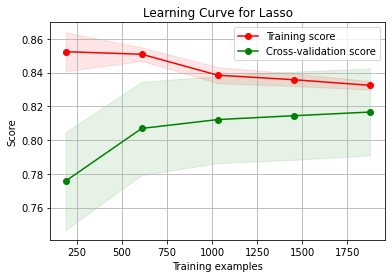

In [ ]:
plot_learning_curve(grid_lasso, "Learning Curve for Lasso",X = X_train, y = y_train, cv = cv)

In [ ]:
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [ ]:

grid_ridge = GridSearchCV(estimator=model_ridge, param_grid=param_grid,  cv=cv)
grid_ridge.fit(X_train, y_train)
print('Best Score: ', grid_ridge.best_score_)
print('Best Params: ', grid_ridge.best_params_)

Best Score:  0.8228387121657863
Best Params:  {'ridge__alpha': 0.001}


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

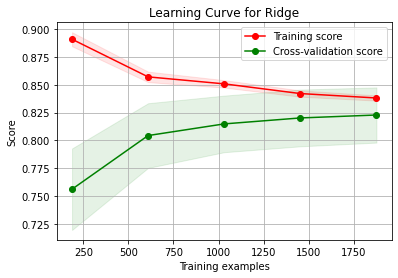

In [ ]:
plot_learning_curve(grid_ridge, "Learning Curve for Ridge",X = X_train, y = y_train, cv = cv)

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
params = {
    'svr': {
'svr__kernel' : ["linear", "rbf", "sigmoid"],'svr__C' : [1,10],
},
'decision_tree': {
 "decisiontreeregressor__max_leaf_nodes": [5, 20, 100],
                      "decisiontreeregressor__min_samples_leaf": [20, 40, 100],
                   "decisiontreeregressor__min_samples_split": [10, 20, 40],
                  'decisiontreeregressor__criterion': ['squared_error','friedman_mse', 'absolute_error', 'poisson'],
  'decisiontreeregressor__max_depth': [10,  40, 100],
  },
'randomforest': {
 'randomforestregressor__max_depth' : [10, 20, 30],
                      'randomforestregressor__max_features':['auto', 'sqrt', 'log2'],
                   'randomforestregressor__n_estimators' : [10, 20, 100],
},
'gradient_boosting': {'gradientboostingregressor__n_estimators': [10, 100,
200],
'gradientboostingregressor__loss': ['squared_error', 'huber',
'quantile'],
'gradientboostingregressor__criterion': ['friedman_mse',
'squared_error']

}
}

In [14]:
param_grid = {'svr__C': [0.1,1, 10, 100], 'svr__gamma': [1,0.1,0.01,0.001],'svr__kernel': ['rbf', 'poly', 'sigmoid']}

In [13]:
model_svr=make_pipeline(MinMaxScaler(),SVR())
model_rfr=make_pipeline(MinMaxScaler(), RandomForestRegressor())
model_dtr=make_pipeline(MinMaxScaler(), DecisionTreeRegressor())
model_gb=make_pipeline(MinMaxScaler(), GradientBoostingRegressor())

In [16]:
from sklearn.model_selection import RandomizedSearchCV

In [17]:
rd_svr=RandomizedSearchCV(model_svr,param_grid,scoring='neg_mean_absolute_error')
rd_svr.fit(X_train,y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                             ('svr', SVR())]),
                   param_distributions={'svr__C': [0.1, 1, 10, 100],
                                        'svr__gamma': [1, 0.1, 0.01, 0.001],
                                        'svr__kernel': ['rbf', 'poly',
                                                        'sigmoid']},
                   scoring='neg_mean_absolute_error')

In [18]:
rd_svr.best_params_

{'svr__C': 100, 'svr__gamma': 1, 'svr__kernel': 'poly'}

In [ ]:
rd_svr.best_score_

In [20]:
gd_svr=GridSearchCV(model_svr,param_grid,scoring='neg_mean_absolute_error')
gd_svr.fit(X_train,y_train)
gd_svr.best_params_

{'svr__C': 100, 'svr__gamma': 1, 'svr__kernel': 'poly'}

In [27]:
gd_svr.best_score_

-2167.805157746211

In [ ]:
# svr
# SVR
clf_svr = GridSearchCV(estimator=model_svr, param_grid=param_grid, cv=cv)

# start training
clf_svr.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=42),
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('svr', SVR())]),
             param_grid={'svr__C': [0.1, 1, 10, 100],
                         'svr__gamma': [1, 0.1, 0.01, 0.001],
                         'svr__kernel': ['rbf', 'poly', 'sigmoid']})

In [21]:
rd_dtr=RandomizedSearchCV(model_dtr,params['decision_tree'],scoring='neg_mean_absolute_error')
rd_dtr.fit(X_train,y_train)
rd_dtr.best_params_

{'decisiontreeregressor__criterion': 'squared_error',
 'decisiontreeregressor__max_depth': 10,
 'decisiontreeregressor__max_leaf_nodes': 100,
 'decisiontreeregressor__min_samples_leaf': 20,
 'decisiontreeregressor__min_samples_split': 40}

In [22]:
gd_dtr=GridSearchCV(model_dtr,params['decision_tree'],scoring='neg_mean_absolute_error')
gd_dtr.fit(X_train,y_train)
gd_dtr.best_params_

{'decisiontreeregressor__criterion': 'absolute_error',
 'decisiontreeregressor__max_depth': 100,
 'decisiontreeregressor__max_leaf_nodes': 100,
 'decisiontreeregressor__min_samples_leaf': 20,
 'decisiontreeregressor__min_samples_split': 40}

In [28]:
rd_dtr.best_score_

-2004.2780063734783

In [29]:
gd_dtr.best_score_

-1866.0947242206234

In [ ]:
# Decision trees
clf_dtr = GridSearchCV(estimator=model_dtr, param_grid=params['decision_tree'], cv=cv)

# start training
clf_dtr.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=42),
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor())]),
             param_grid={'decisiontreeregressor__criterion': ['squared_error',
                                                              'friedman_mse',
                                                              'absolute_error',
                                                              'poisson'],
                         'decisiontreeregressor__max_depth': [10, 40, 100],
                         'decisiontreeregressor__max_leaf_nodes': [5, 20, 100],
                         'decisiontreeregressor__min_samples_leaf': [20, 40,
                                                                     100],
                         'decisiontreeregressor__min_samples_split': [10, 20,
                      

In [23]:
rd_rfr=RandomizedSearchCV(model_rfr,params['randomforest'],scoring='neg_mean_absolute_error')
rd_rfr.fit(X_train,y_train)
rd_rfr.best_params_

{'randomforestregressor__max_depth': 20,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__n_estimators': 20}

In [24]:
gd_rfr=GridSearchCV(model_rfr,params['randomforest'],scoring='neg_mean_absolute_error')
gd_rfr.fit(X_train,y_train)
gd_rfr.best_params_

{'randomforestregressor__max_depth': 20,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__n_estimators': 100}

In [30]:
rd_rfr.best_score_

-1353.5315621271097

In [31]:
gd_rfr.best_score_

-1298.4228029756032

In [ ]:
# Random Forest
clf_rfr = GridSearchCV(estimator=model_rfr, param_grid=params['randomforest'], cv=cv)

# start training
clf_rfr.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=42),
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('randomforestregressor',
                                        RandomForestRegressor())]),
             param_grid={'randomforestregressor__max_depth': [10, 20, 30],
                         'randomforestregressor__max_features': ['auto', 'sqrt',
                                                                 'log2'],
                         'randomforestregressor__n_estimators': [10, 20, 100]})

In [25]:
rd_gb=RandomizedSearchCV(model_gb,params['gradient_boosting'],scoring='neg_mean_absolute_error')
rd_gb.fit(X_train,y_train)
rd_gb.best_params_

{'gradientboostingregressor__criterion': 'friedman_mse',
 'gradientboostingregressor__loss': 'huber',
 'gradientboostingregressor__n_estimators': 200}

In [26]:
gd_gb=GridSearchCV(model_gb,params['gradient_boosting'],scoring='neg_mean_absolute_error')
gd_gb.fit(X_train,y_train)
gd_gb.best_params_

{'gradientboostingregressor__criterion': 'friedman_mse',
 'gradientboostingregressor__loss': 'huber',
 'gradientboostingregressor__n_estimators': 200}

In [32]:
rd_gb.best_score_

-1477.593801758821

In [33]:
gd_gb.best_score_

-1461.186792627591

In [ ]:
# Gradient Boosting
clf_gb = GridSearchCV(estimator=model_gb, param_grid=params['gradient_boosting'], cv=cv)

# start training
clf_gb.fit(X_train, y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=42),
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('gradientboostingregressor',
                                        GradientBoostingRegressor())]),
             param_grid={'gradientboostingregressor__criterion': ['friedman_mse',
                                                                  'squared_error'],
                         'gradientboostingregressor__loss': ['squared_error',
                                                             'huber',
                                                             'quantile'],
                         'gradientboostingregressor__n_estimators': [10, 100,
                                                                     200]})

In [ ]:
def transform_params(best_params):
    new_best_params = {}
    for k, v in best_params.items():
        new_k = k.split("__")[1]
        new_best_params[new_k] = v
    return new_best_params

In [ ]:
best_svr=transform_params(clf_svr.best_params_)
print(best_svr)

{'C': 100, 'gamma': 1, 'kernel': 'poly'}


In [ ]:
best_rf=transform_params(clf_rfr.best_params_)
print(best_rf)

{'max_depth': 30, 'max_features': 'auto', 'n_estimators': 100}


In [ ]:
best_dt=transform_params(clf_dtr.best_params_)
print(best_dt)

{'criterion': 'squared_error', 'max_depth': 100, 'max_leaf_nodes': 100, 'min_samples_leaf': 20, 'min_samples_split': 20}


In [ ]:
best_gb=transform_params(clf_gb.best_params_)
print(best_gb)

{'criterion': 'squared_error', 'loss': 'squared_error', 'n_estimators': 200}


In [ ]:
best_model_svr = clf_svr.best_estimator_
best_model_svr

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('svr', SVR(C=100, gamma=1, kernel='poly'))])

In [ ]:
print("Accuracy of the tuned SVR model: %.4f" %clf_svr.best_score_)

Accuracy of the tuned SVR model: 0.8617


In [ ]:
best_model_dtr = clf_dtr.best_estimator_
best_model_dtr

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=100, max_leaf_nodes=100,
                                       min_samples_leaf=20,
                                       min_samples_split=20))])

In [ ]:
print("Accuracy of the tuned DTR model: %.4f" %clf_dtr.best_score_)

Accuracy of the tuned DTR model: 0.8929


In [ ]:
best_model_rfr = clf_rfr.best_estimator_
best_model_rfr

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('randomforestregressor', RandomForestRegressor(max_depth=30))])

In [ ]:
print("Accuracy of the tuned RFR model: %.4f" %clf_rfr.best_score_)

Accuracy of the tuned RFR model: 0.9488


In [ ]:
best_model_gb = clf_gb.best_estimator_
best_model_gb

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(criterion='squared_error',
                                           n_estimators=200))])

In [ ]:
print("Accuracy of the tuned GB model: %.4f" %clf_gb.best_score_)

Accuracy of the tuned GB model: 0.9329


In [ ]:
model_svr_best = SVR(C=10, gamma=1, kernel='linear')
plot_learning_curve(model_svr_best, "Learning Curve for SVR",X = X_train, y = y_train, cv = cv)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

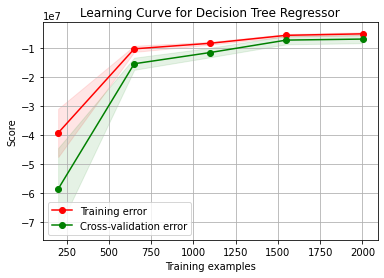

In [ ]:
model_dtr_best = DecisionTreeRegressor(**best_dt)
plot_learning_curve(model_dtr_best, "Learning Curve for Decision Tree Regressor",X = X_train, y = y_train, cv = cv)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

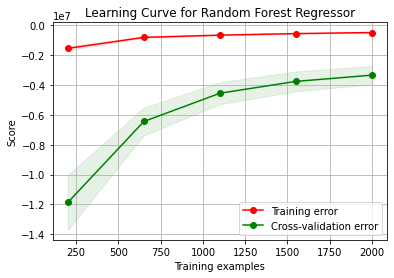

In [ ]:
model_rfr_best = RandomForestRegressor(**best_rf)
plot_learning_curve(model_rfr_best, "Learning Curve for Random Forest Regressor",X = X_train, y = y_train, cv = cv)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

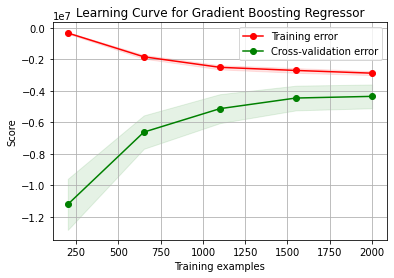

In [ ]:
model_gb_best =GradientBoostingRegressor(**best_gb)
plot_learning_curve(model_gb_best, "Learning Curve for Gradient Boosting Regressor",X = X_train, y = y_train, cv = cv)

In [ ]:
params = {
 'adaboostregressor__n_estimators': [50, 100],
 'adaboostregressor__learning_rate' : [0.01, 0.05, 0.1, 0.5],
 'adaboostregressor__loss' : ['linear', 'square', 'exponential']
 }

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

In [ ]:
abreg = make_pipeline(MinMaxScaler(), AdaBoostRegressor())

In [ ]:
grid_ada=GridSearchCV(abreg, params, cv=cv, return_train_score=True)
grid_ada.fit(X_train, y_train)
print('Best Score: ', grid_ada.best_score_)
print('Best Params: ', grid_ada.best_params_)

Best Score:  0.7645087067798484
Best Params:  {'adaboostregressor__learning_rate': 0.5, 'adaboostregressor__loss': 'square', 'adaboostregressor__n_estimators': 100}


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

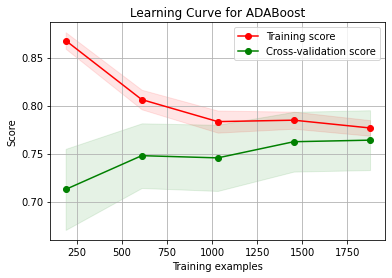

In [ ]:
model_ada_best =AdaBoostRegressor(**transform_params(grid_ada.best_params_))
plot_learning_curve(model_ada_best, "Learning Curve for ADABoost",X = X_train, y = y_train, cv = cv)

In [62]:
def print_error_metrics(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    print('R2: {:.5f}'.format(r2))
    print('MSE: {:.5f}'.format(mse))
    print('RMSE: {:.5f}'.format(rmse))
    print('MAE: {:.5f}'.format(mae))

In [ ]:
new_dtr =    DecisionTreeRegressor(criterion='squared_error',max_depth=100, max_leaf_nodes=100,
                                       min_samples_leaf=20,
                                       min_samples_split=20)
new_rfr=RandomForestRegressor(max_depth=30,max_features= 'auto', n_estimators=100)



In [ ]:
new_svr=SVR(C=100, gamma=1, kernel='poly')
new_svr.fit(X_train, y_train)
yhat_svr= new_svr.predict(X_test)

In [ ]:
new_dtr.fit(X_train, y_train)
yhat_dtr= new_dtr.predict(X_test)

In [ ]:
new_rfr.fit(X_train, y_train)
yhat_rfr= new_rfr.predict(X_test)

In [ ]:
new_gb=GradientBoostingRegressor(criterion='squared_error',loss='squared_error',
                                           n_estimators=200)
new_gb.fit(X_train,y_train)
yhat_gb= new_gb.predict(X_test)

In [ ]:
print_error_metrics(y_test, yhat_svr)

In [ ]:
print_error_metrics(y_test, yhat_dtr)

R2: 0.90851
MSE: 6039964.61487
RMSE: 2457.63395
MAE: 1777.32341


In [ ]:
print_error_metrics(y_test, yhat_rfr)

R2: 0.95855
MSE: 2736574.43963
RMSE: 1654.25948
MAE: 1173.21454


In [ ]:
print_error_metrics(y_test, yhat_gb)

R2: 0.94329
MSE: 3743562.24141
RMSE: 1934.82874
MAE: 1404.12565


In [43]:
import keras
from keras.models import Sequential
from keras.layers import Activation, Dense

In [44]:
model = Sequential(layers=None, name=None)
model.add(Dense(40, input_dim=75,  activation = 'tanh'))
model.add(Dense(20, activation = 'tanh'))
model.add(Dense(1))


In [47]:
from tensorflow.keras.optimizers import SGD
sgd = SGD()

In [76]:
model.compile(loss='mean_squared_error', optimizer=sgd)
 # stochastic gradient descent optimizer
# for regression problems, mean squared error (MSE) is often employed

In [56]:
 # summary of the model
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                3040      
                                                                 
 dense_1 (Dense)             (None, 20)                820       
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 3,881
Trainable params: 3,881
Non-trainable params: 0
_________________________________________________________________


In [ ]:
nn_model=make_pipeline(MinMaxScaler)

In [61]:
history=model.fit(X_train,y_train,validation_split=0.2,batch_size=50,epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 4ms/step - loss: 68295944.0000 - val_loss: 59628476.0000
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 68557856.0000 - val_loss: 59671496.0000
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 68519592.0000 - val_loss: 60076844.0000
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 68692624.0000 - val_loss: 61094296.0000
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 68810920.0000 - val_loss: 59623548.0000
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 68782592.0000 - val_loss: 61858592.0000
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 68372880.0000 - val_loss: 59619668.0000
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 68255504.0000 - val_loss: 61242056.0000
Epoch 9/100
34/34 [==============================] - 0s 4ms/step - loss: 68367824.0000 - val_los

In [51]:
ypred = model.predict(X_test)

In [63]:
print_error_metrics(y_test, ypred)

R2: -0.01445
MSE: 65916075.59195
RMSE: 8118.87157
MAE: 6206.24249


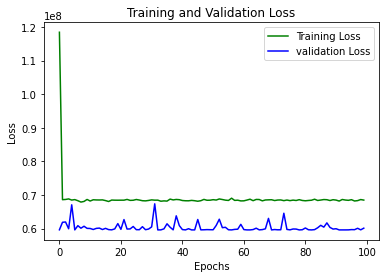

In [53]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
plt.plot(loss_train, 'g', label='Training Loss')
plt.plot(loss_val, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [69]:
from sklearn.preprocessing import normalize

In [72]:
y_train

45      26738
1874    21242
1095    42272
848     26735
931     20529
        ...  
2014    21072
2157    24356
1931    23032
1504    20275
1712    20102
Name: sold, Length: 2085, dtype: int64

In [81]:
optimizer = ['SGD', 'RMSprop']
neurons = [ 10,  20, 40]
neurons2 = [5, 15, 25]
param_grid = dict(neurons=neurons,neurons2=neurons2,optimizer=optimizer)

In [85]:
from keras.wrappers.scikit_learn import KerasRegressor

In [91]:
def create_model(neurons=40,neurons2=20,optimizer='SGD'):
  model = Sequential(layers=None, name=None)
  model.add(Dense(neurons, input_dim=75,  activation = 'tanh'))
  model.add(Dense(neurons2, activation = 'tanh'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error', optimizer=optimizer)
  return model

In [83]:
cv = RepeatedKFold(n_splits=3,random_state=42)

In [92]:
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=20, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


In [ ]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=cv)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


In [ ]:
best_model=transform_params(grid_result.best_params_)
print(best_model)

In [ ]:
best_model = grid_result.best_estimator_
best_model

In [ ]:
from sklearn.linear_model import ElasticNet
# Train model with default alpha=1 and l1_ratio=0.5
elastic_net = ElasticNet(alpha=1, l1_ratio=0.5).fit(X_train, y_train)
# get cross val scores
get_cv_scores(elastic_net)

CV Mean:  0.24482880828334297
STD:  0.0070396261187266745




In [ ]:
# find optimal alpha with grid search
alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
l1_ratio = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
param_grid = dict(alpha=alpha, l1_ratio=l1_ratio)
grid = GridSearchCV(estimator=elastic_net, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 5 folds for each of 77 candidates, totalling 385 fits
Best Score:  0.8104903351725804
Best Params:  {'alpha': 1, 'l1_ratio': 1}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.624e+07, tolerance: 1.383e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [ ]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.8218196303155274

In [ ]:
reg.coef_

array([-4.54600910e+15, -2.19033126e+17,  6.29834133e+16, -2.78812441e+16,
       -2.78812441e+16, -2.78812441e+16, -2.78812441e+16,  1.86605872e+17,
        1.86605872e+17,  1.86605872e+17, -9.54106665e+16, -9.54106665e+16,
       -9.54106665e+16, -1.42748730e+16, -1.42748730e+16, -1.42748730e+16,
       -1.42748730e+16,  1.24285478e+16, -9.43585671e+15,  1.24285478e+16,
       -9.43585671e+15,  1.24285478e+16,  1.24285478e+16,  1.24285478e+16,
        1.24285478e+16,  1.24285478e+16, -9.43585671e+15, -9.43585671e+15,
        1.24285478e+16,  1.24285478e+16, -9.43585671e+15, -9.43585671e+15,
        1.24285478e+16, -4.32106291e+15, -4.32106291e+15, -9.43585671e+15,
        1.24285478e+16,  1.24285478e+16,  1.24285478e+16, -9.43585671e+15,
        1.24285478e+16,  1.24285478e+16,  1.24285478e+16, -4.32106291e+15,
       -9.43585671e+15,  1.24285478e+16, -9.43585671e+15, -3.72856435e+16,
        2.97800000e+03,  2.18644045e+16, -4.50000000e+02,  1.67496107e+16,
        7.41603341e+14,  

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
import lightgbm as lgb
from sklearn.linear_model import Ridge
import gc


In [ ]:
train_set = lgb.Dataset(X_train, label=y_train)
val_set = lgb.Dataset(X_test, label=y_test)
    
params = {
        'boosting_type': 'gbdt',
        'metric': 'rmse',
        'objective': 'regression',
        'n_jobs': -1,
        'seed': 236,
        'learning_rate': 0.1,
        'bagging_fraction': 0.75,
        'bagging_freq': 10, 
        'colsample_bytree': 0.75}
    
model = lgb.train(params, train_set, num_boost_round = 1000, early_stopping_rounds = 50, valid_sets = [train_set, val_set], verbose_eval = 100)

val_pred = model.predict(X_test)
val_score = np.sqrt(metrics.mean_squared_error(val_pred, y_test))
print('val rmse score is {}'.format(val_score))


Training until validation scores don't improve for 50 rounds.
[100]	training's rmse: 1226.61	valid_1's rmse: 2144.05
[200]	training's rmse: 976.462	valid_1's rmse: 2038.91
[300]	training's rmse: 865.01	valid_1's rmse: 1987.64
[400]	training's rmse: 778.711	valid_1's rmse: 1956.91
[500]	training's rmse: 710.031	valid_1's rmse: 1929.83
Early stopping, best iteration is:
[493]	training's rmse: 715.699	valid_1's rmse: 1928.35
val rmse score is 1928.3481593428307


In [ ]:

# Create an instance of a linear regression model and fit it to the data with the fit() function:
model = LinearRegression().fit(X, y) 

# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = model.score(X, y)
print('coefficient of determination:', r_sq)

# Print the Intercept:
print('intercept:', model.intercept_)

# Print the Slope:
print('slope:', model.coef_) 

# Predict a Response and print it:
y_pred = model.predict(X)
print('Predicted response:', y_pred, sep='\n')

coefficient of determination: 0.8094280282888494
intercept: 6.131132941622072e+16
slope: [ 1.21675075e+17  1.09393430e+17  8.62670817e+16 -1.14260396e+17
 -1.14260396e+17 -1.14260396e+17 -1.14260396e+17 -1.01978750e+17
 -1.01978750e+17 -1.01978750e+17 -7.88524026e+16 -7.88524026e+16
 -7.88524026e+16 -6.87099844e+16 -6.87099844e+16 -6.87099844e+16
 -6.87099844e+16  3.10388844e+15 -1.26222061e+16  3.10388844e+15
 -1.26222061e+16  3.10388844e+15  3.10388844e+15  3.10388844e+15
  3.10388844e+15  3.10388844e+15 -1.26222061e+16 -1.26222061e+16
  3.10388844e+15  3.10388844e+15 -1.26222061e+16 -1.26222061e+16
  3.10388844e+15 -1.38178973e+17 -1.38178973e+17 -1.26222061e+16
  3.10388844e+15  3.10388844e+15  3.10388844e+15 -1.26222061e+16
  3.10388844e+15  3.10388844e+15  3.10388844e+15 -1.38178973e+17
 -1.26222061e+16  3.10388844e+15 -1.26222061e+16 -9.31166531e+15
  2.78400000e+03  1.57260945e+16 -5.56000000e+02  1.41282861e+17
  1.27520067e+16  1.72040000e+04 -1.98400000e+03  1.41600000e+03
 

# 7. Feature Importance and Feature Selection <a class="anchor" id="seventh-bullet">

Recall:

    Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.

Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.

Three benefits of performing feature selection before modeling your data are:

* **Reduces Overfitting**: Less redundant data means less opportunity to make decisions based on noise.
* **Improves Accuracy**: Less misleading data means modeling accuracy improves.
* **Reduces Training Time**: Less data means that algorithms train faster.

## Recursive Feature Elimination

Use RFE to get the ranks of top 2 features and print them up.

In [ ]:
feature_names=['California', 'Texas', 'Wisconsin', 'CA_1', 'CA_2', 'CA_3', 'CA_4',
       'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3', 'fall', 'spring',
       'summer', 'winter', 'ChanukahEnd', 'Christmas', 'CincoDeMayo',
       'ColumbusDay', 'Easter', 'EidAlAdha', 'Eidal-Fitr', 'Fathersday',
       'Halloween', 'IndependenceDay', 'LaborDay', 'LentStart', 'LentWeek2',
       'MartinLutherKingDay', 'MemorialDay', 'Mothersday', 'NBAFinalsEnd',
       'NBAFinalsStart', 'NewYear', 'OrthodoxChristmas', 'OrthodoxEaster',
       'PesachEnd', 'PresidentsDay', 'PurimEnd', 'Ramadanstarts',
       'StPatricksDay', 'SuperBowl', 'Thanksgiving', 'ValentinesDay',
       'VeteransDay', 'number_of_events', 'Cultural', 'National', 'Religious',
       'Sporting', 'raw_visit_counts', 'raw_visitor_counts',
       'distance_from_home', 'median_dwell', '<5', '5-10', '11-20', '21-60',
       '61-120', '121-240', '>240', 'number_stores_visited_daily',
       'other_stores_avg_visitors_daily', 'average_visitors_same_day_yj',
       'number_stores_visited_weekly', 'other_stores_avg_visitors_weekly',
       'average_visitors_same_week_yj', 'population', 'employed', 'unemployed',
       'unemployment_rate']

In [ ]:
NUM_FEATURES_RFE = 2
estimator = DecisionTreeRegressor()
selector = RFE(estimator, n_features_to_select=10)
fit = selector.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
selected = []
for i in range(len(fit.support_)):
    if fit.support_[i]:
        selected.append(feature_names[i])
print('Selected Features: ', selected)


Num Features: 10
Selected Features: [False False False  True False  True  True False  True False False  True
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False  True False False  True False
  True]
Feature Ranking: [59 58 63  1 64  1  1 15  1 34  8  1  1 37 26  6 23 31 16 53 62 36 57 40
 30 50 51 48 35 32 44 61 55 49 39 27 60 46 47 56 43 52 41 54 33 45 42 21
 29 22 28 38 25 24  5 12 19  1  2 14  4 10 11  7 20 18 17  1  9  3  1 13
  1]
Selected Features:  ['CA_1', 'CA_3', 'CA_4', 'TX_2', 'WI_2', 'WI_3', '5-10', 'other_stores_avg_visitors_weekly', 'employed', 'unemployment_rate']


## Feature Importance - Extra Trees 


Write the appropriate code to plot the feature importances of an Extra Trees model.

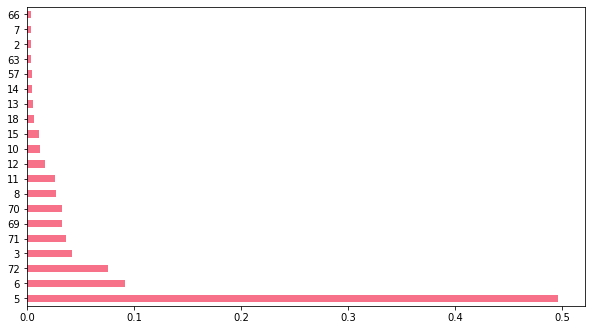

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

# Initialize the model
model_et = ExtraTreesRegressor(n_estimators=100, random_state=42)
# train the model
model_et.fit(X_train, y_train)
# Plot the feature importance scores. 
feat_importances = pd.Series(model_et.feature_importances_)
feat_importances.nlargest(20).plot(kind='barh')
fig = plt.gcf()
fig.set_size_inches(10, 5.5)

##Feature Selection Numerical

In [ ]:
temp_df=df._get_numeric_data()

In [ ]:
temp_df

,California,Texas,Wisconsin,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,...,other_stores_avg_visitors_daily,average_visitors_same_day_yj,number_stores_visited_weekly,other_stores_avg_visitors_weekly,average_visitors_same_week_yj,population,employed,unemployed,unemployment_rate,sold
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.162703,12.75,233,7.742210,18.843750,649528.517241,280312.706897,37189.137931,13.425345,11308
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.894174,10.00,173,6.135069,20.000000,79247.388889,39458.319444,3316.180556,8.463889,11553
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.169162,45.00,308,8.138411,50.000000,100962.299213,45413.779528,3816.582677,7.497480,8261
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.169162,45.00,308,8.138411,50.000000,100962.299213,45413.779528,3816.582677,7.497480,7065
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,2.169162,45.00,308,8.138411,50.000000,100962.299213,45413.779528,3816.582677,7.497480,10520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2775,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.133195,14.00,242,7.615986,22.000000,677525.448276,311186.724138,18014.396552,6.930172,28566
2776,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.164043,46.00,286,8.356229,57.000000,109861.661417,50008.393701,2421.515748,5.118189,25126
2777,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,2.164043,46.00,286,8.356229,57.000000,109861.661417,50008.393701,2421.515748,5.118189,21660
2778,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.882406,9.00,146,6.837417,22.792636,80179.402778,41742.805556,1736.819444,4.401389,23912


In [ ]:
temp_df.dropna(axis=0,inplace=True)

In [ ]:
temp_df.columns

Index(['California', 'Texas', 'Wisconsin', 'CA_1', 'CA_2', 'CA_3', 'CA_4',
       'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3', 'year', 'quarter',
       'month', 'week', 'day', 'fall', 'spring', 'summer', 'winter',
       'dayofweek', 'is_weekend', 'ChanukahEnd', 'Christmas', 'CincoDeMayo',
       'ColumbusDay', 'Easter', 'EidAlAdha', 'Eidal-Fitr', 'Fathersday',
       'Halloween', 'IndependenceDay', 'LaborDay', 'LentStart', 'LentWeek2',
       'MartinLutherKingDay', 'MemorialDay', 'Mothersday', 'NBAFinalsEnd',
       'NBAFinalsStart', 'NewYear', 'OrthodoxChristmas', 'OrthodoxEaster',
       'PesachEnd', 'PresidentsDay', 'PurimEnd', 'Ramadanstarts',
       'StPatricksDay', 'SuperBowl', 'Thanksgiving', 'ValentinesDay',
       'VeteransDay', 'number_of_events', 'Cultural', 'National', 'Religious',
       'Sporting', 'raw_visit_counts', 'raw_visitor_counts',
       'distance_from_home', 'median_dwell', '<5', '5-10', '11-20', '21-60',
       '61-120', '121-240', '>240', 'number_stores_v

In [ ]:
cols=['California', 'Texas', 'Wisconsin', 'CA_1', 'CA_2', 'CA_3', 'CA_4',
       'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3',  'fall', 'spring', 'summer', 'winter',
       'dayofweek', 'is_weekend', 'ChanukahEnd', 'Christmas', 'CincoDeMayo',
       'ColumbusDay', 'Easter', 'EidAlAdha', 'Eidal-Fitr', 'Fathersday',
       'Halloween', 'IndependenceDay', 'LaborDay', 'LentStart', 'LentWeek2',
       'MartinLutherKingDay', 'MemorialDay', 'Mothersday', 'NBAFinalsEnd',
       'NBAFinalsStart', 'NewYear', 'OrthodoxChristmas', 'OrthodoxEaster',
       'PesachEnd', 'PresidentsDay', 'PurimEnd', 'Ramadanstarts',
       'StPatricksDay', 'SuperBowl', 'Thanksgiving', 'ValentinesDay',
       'VeteransDay', 'number_of_events', 'Cultural', 'National', 'Religious',
       'Sporting', 'raw_visit_counts', 'raw_visitor_counts',
       'distance_from_home', 'median_dwell', '<5', '5-10', '11-20', '21-60',
       '61-120', '121-240', '>240', 'number_stores_visited_daily',
       'other_stores_avg_visitors_daily', 'average_visitors_same_day_yj',
       'number_stores_visited_weekly', 'other_stores_avg_visitors_weekly',
       'average_visitors_same_week_yj', 'population', 'employed', 'unemployed',
       'unemployment_rate', 'sold']

In [ ]:
temp_df=temp_df[cols]

In [ ]:
temp_df[53:].values

array([[7.00000000e+00, 1.00000000e+00, 4.89079545e+02, ...,
        2.21920000e+04, 1.89280000e+04, 1.08450000e+04],
       [9.00000000e+00, 1.00000000e+00, 4.89079545e+02, ...,
        2.21920000e+04, 2.35360000e+04, 2.52560000e+04],
       [8.00000000e+00, 1.00000000e+00, 4.89079545e+02, ...,
        2.21920000e+04, 2.40960000e+04, 1.25030000e+04],
       ...,
       [4.00000000e+00, 1.00000000e+00, 1.04715444e+03, ...,
        2.30560000e+04, 2.04800000e+04, 2.16600000e+04],
       [7.00000000e+00, 1.00000000e+00, 6.27727273e+02, ...,
        2.21920000e+04, 1.89280000e+04, 2.39120000e+04],
       [8.00000000e+00, 1.00000000e+00, 6.27727273e+02, ...,
        2.21920000e+04, 2.40960000e+04, 2.89500000e+04]])

In [ ]:

data=temp_df.values
X, y = data[:, :-1], data[:, -1]

[8.03024283e-04 1.22796301e-05 6.23923494e-05 3.57829031e-02
 1.00612853e-03 4.73679066e-01 8.71009037e-02 4.89805575e-03
 2.43778022e-02 6.56703673e-04 6.02995911e-03 2.54698687e-02
 4.19924518e-02 6.31876389e-04 2.41208320e-03 6.26455225e-03
 9.52338655e-04 0.00000000e+00 0.00000000e+00 1.24027993e-04
 2.81837197e-03 6.65969362e-05 1.43410458e-04 1.13883634e-04
 1.00761124e-04 7.07828985e-05 4.65076034e-05 2.96771853e-05
 1.06981894e-04 6.03766435e-05 2.01942441e-04 5.85630802e-05
 2.94192385e-05 1.03420381e-04 7.19554752e-05 6.97935211e-05
 1.12748016e-04 8.74005705e-04 6.35927738e-05 5.44802563e-05
 6.93143963e-05 7.11038804e-05 7.88926961e-05 8.23055223e-05
 1.12434289e-04 3.79523825e-05 2.61286143e-04 7.72399548e-05
 2.81960927e-05 1.42608436e-03 4.91981458e-04 8.14185566e-04
 3.61250528e-04 1.82729567e-04 2.77869051e-03 2.92907998e-03
 6.49854961e-03 5.27014506e-03 3.08783994e-03 6.76902903e-03
 5.12061912e-03 3.27923944e-03 8.45654605e-03 4.24656284e-03
 4.13453532e-03 5.397689

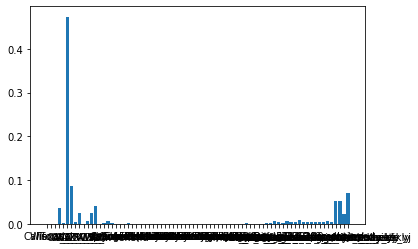

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
# load the dataset
from sklearn.ensemble import RandomForestRegressor

data=temp_df.values
X, y = data[:, :-1], data[:, -1]
# fit random forest model
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)
# show importance scores
print(model.feature_importances_)
# plot importance scores
names = temp_df.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, model.feature_importances_)
pyplot.xticks(ticks, names)
pyplot.show()

Selected Features:
CA_3
61-120
population
employed


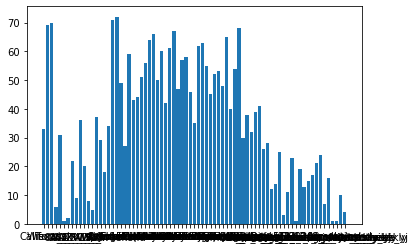

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), n_features_to_select=4)
fit = rfe.fit(X, y)
# report selected features
print('Selected Features:')
names = temp_df.columns.values[0:-1]
for i in range(len(fit.support_)):
	if fit.support_[i]:
	 	print(names[i])
# plot feature rank
names = temp_df.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, fit.ranking_)
pyplot.xticks(ticks, names)
pyplot.show()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [17 18 24 30] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Feature 0: 1.852068
Feature 1: 0.989997
Feature 2: 1.108457
Feature 3: 1.094857
Feature 4: 1.532842
Feature 5: 11.603729
Feature 6: 4.034164
Feature 7: 0.967647
Feature 8: 0.723928
Feature 9: 0.991083
Feature 10: 0.924754
Feature 11: 1.276735
Feature 12: 0.864130
Feature 13: 1.431808
Feature 14: 1.091289
Feature 15: 1.310670
Feature 16: 0.851203
Feature 17: nan
Feature 18: nan
Feature 19: 0.711112
Feature 20: 2.135747
Feature 21: 0.657556
Feature 22: 2.204567
Feature 23: 2.684163
Feature 24: inf
Feature 25: 0.593059
Feature 26: 1.050066
Feature 27: 1.153181
Feature 28: 2.204567
Feature 29: 0.535609
Feature 30: inf
Feature 31: 0.916424
Feature 32: 0.426170
Feature 33: 1.084476
Feature 34: 0.780210
Feature 35: 2.135747
Feature 36: 0.575931
Feature 37: 0.642216
Feature 38: 0.371084
Feature 39: 2.752371
Feature 40: 1.118848
Feature 41: 1.494411
Feature 42: 0.870978
Feature 43: 0.524431
Feature 44: 0.916424
Feature 45: 1.007011
Feature 46: 2.341977
Feature 47: 1.494411
Feature 48: 0.734027


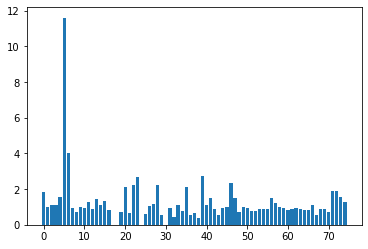

In [ ]:
# feature selection
def select_features(X_train, y_train, X_test):
  # configure to select all features
  fs = SelectKBest(score_func=f_classif, k='all')
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs
# load the dataset
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
  print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Feature 0: 1077.284031
Feature 1: 1263.544304
Feature 2: 1276.001835
Feature 3: 1614.482051
Feature 4: 1627.192893
Feature 5: 1675.856354
Feature 6: 1656.376963
Feature 7: 1614.574468
Feature 8: 1593.600000
Feature 9: 1628.480000
Feature 10: 1620.586592
Feature 11: 1632.461957
Feature 12: 1613.500000
Feature 13: 1399.196262
Feature 14: 1322.828629
Feature 15: 1376.593750
Feature 16: 1316.900000
Feature 17: nan
Feature 18: nan
Feature 19: 1742.718750
Feature 20: 1800.967742
Feature 21: 1718.900000
Feature 22: 1800.906250
Feature 23: 1799.128205
Feature 24: 1830.000000
Feature 25: 1722.555556
Feature 26: 1770.935484
Feature 27: 1773.235294
Feature 28: 1800.906250
Feature 29: 1707.463415
Feature 30: 1822.000000
Feature 31: 1752.878049
Feature 32: 1687.939394
Feature 33: 1771.812500
Feature 34: 1735.765957
Feature 35: 1800.967742
Feature 36: 1720.600000
Feature 37: 1736.689655
Feature 38: 1672.482759
Feature 39: 1798.725000
Feature 40: 1772.575758
Feature 41: 1775.681818
Feature 42: 1751.3

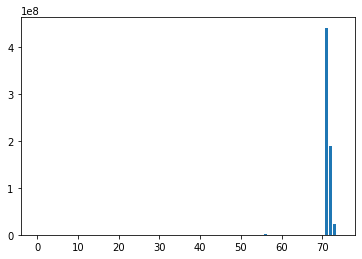

In [ ]:
# feature selection
def select_features(X_train, y_train, X_test):
# configure to select all features
  fs = SelectKBest(score_func=chi2
                   , k='all')
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):  print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

KeyboardInterrupt: ignored

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

ValueError: ignored

In [ ]:
# feature selection
def select_features(X_train, y_train, X_test):
  # configure to select a subset of features
  fs = SelectKBest(score_func=f_classif, k=4)
  # learn relationship from training data
  fs.fit(X_train, y_train)
  # transform train input data
  X_train_fs = fs.transform(X_train)
  # transform test input data
  X_test_fs = fs.transform(X_test)
  return X_train_fs, X_test_fs, fs

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [17 18 24 30] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Accuracy: 0.00


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)

accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [17 18 24 30] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Accuracy: 0.00


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

Feature: 0, Score: 48533839521.86173
Feature: 1, Score: 26473002099.01111
Feature: 2, Score: 26472997433.61453
Feature: 3, Score: -13236497960.96749
Feature: 4, Score: -13236505205.03880
Feature: 5, Score: -13236485258.47401
Feature: 6, Score: -13236511089.43130
Feature: 7, Score: 8824331452.91397
Feature: 8, Score: 8824337340.75223
Feature: 9, Score: 8824333298.65865
Feature: 10, Score: 8824329217.72176
Feature: 11, Score: 8824334384.92325
Feature: 12, Score: 8824333825.81942
Feature: 13, Score: 1252.02596
Feature: 14, Score: -987.42027
Feature: 15, Score: 867.90688
Feature: 16, Score: -1132.49518
Feature: 17, Score: -0.00021
Feature: 18, Score: -0.00026
Feature: 19, Score: 775.20183
Feature: 20, Score: -2482.94547
Feature: 21, Score: -622.66333
Feature: 22, Score: 1390.56933
Feature: 23, Score: -2185.61675
Feature: 24, Score: 1092.18883
Feature: 25, Score: 1340.01934
Feature: 26, Score: -1738.70175
Feature: 27, Score: -2294.39412
Feature: 28, Score: 1178.24701
Feature: 29, Score: 262

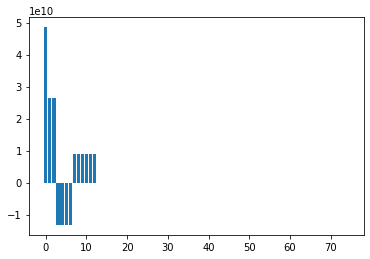

In [ ]:
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
from sklearn.tree import DecisionTreeRegressor

Feature: 0, Score: 0.00004
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00009
Feature: 3, Score: 0.03544
Feature: 4, Score: 0.00001
Feature: 5, Score: 0.47513
Feature: 6, Score: 0.08743
Feature: 7, Score: 0.00453
Feature: 8, Score: 0.02399
Feature: 9, Score: 0.00015
Feature: 10, Score: 0.00972
Feature: 11, Score: 0.02244
Feature: 12, Score: 0.04163
Feature: 13, Score: 0.00026
Feature: 14, Score: 0.00334
Feature: 15, Score: 0.00758
Feature: 16, Score: 0.00138
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00006
Feature: 20, Score: 0.00323
Feature: 21, Score: 0.00001
Feature: 22, Score: 0.00007
Feature: 23, Score: 0.00020
Feature: 24, Score: 0.00007
Feature: 25, Score: 0.00008
Feature: 26, Score: 0.00001
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00001
Feature: 29, Score: 0.00004
Feature: 30, Score: 0.00029
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00001
Feature: 33, Score: 0.00001
Feature: 34, Score: 0.00001
Feature: 35, Score: 0.00005
Fe

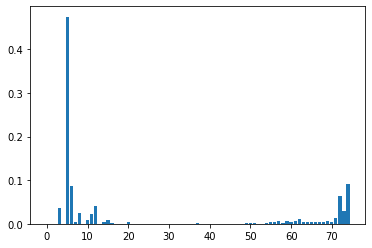

In [ ]:
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Feature: 0, Score: 0.00098
Feature: 1, Score: 0.00080
Feature: 2, Score: 0.00073
Feature: 3, Score: 0.03278
Feature: 4, Score: 0.03171
Feature: 5, Score: 0.03140
Feature: 6, Score: 0.03235
Feature: 7, Score: 0.03161
Feature: 8, Score: 0.03094
Feature: 9, Score: 0.03086
Feature: 10, Score: 0.03407
Feature: 11, Score: 0.03400
Feature: 12, Score: 0.03365
Feature: 13, Score: 0.00245
Feature: 14, Score: 0.00315
Feature: 15, Score: 0.00352
Feature: 16, Score: 0.00200
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00211
Feature: 20, Score: 0.00178
Feature: 21, Score: 0.00151
Feature: 22, Score: 0.00173
Feature: 23, Score: 0.00184
Feature: 24, Score: 0.00192
Feature: 25, Score: 0.00238
Feature: 26, Score: 0.00123
Feature: 27, Score: 0.00117
Feature: 28, Score: 0.00139
Feature: 29, Score: 0.00163
Feature: 30, Score: 0.00232
Feature: 31, Score: 0.00182
Feature: 32, Score: 0.00156
Feature: 33, Score: 0.00094
Feature: 34, Score: 0.00163
Feature: 35, Score: 0.00182
Fe

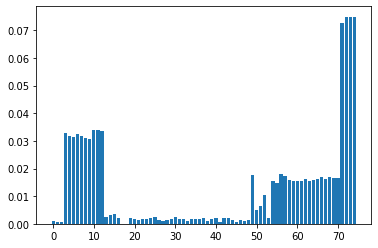

In [ ]:
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00000
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 1088309.78322
Feature: 4, Score: 2051372.36098
Feature: 5, Score: 8580423.15643
Feature: 6, Score: 5114636.95626
Feature: 7, Score: 100174.64101
Feature: 8, Score: 263674.15161
Feature: 9, Score: 14627.45793
Feature: 10, Score: 364847.28334
Feature: 11, Score: 348403.16598
Feature: 12, Score: 271678.71305
Feature: 13, Score: -11856.81529
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 331.38819
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00000
Feature: 19, Score: 0.00000
Feature: 20, Score: 37605.62658
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.00000
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.00000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.

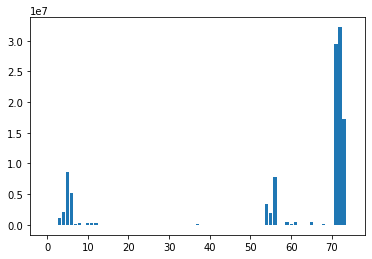

In [ ]:
# permutation feature importance with knn for regression
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

model = KNeighborsRegressor()
# fit the model
model.fit(X, y)
# perform permutation importance
results = permutation_importance(model, X, y, scoring='neg_mean_squared_error')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

In [ ]:
pca = PCA()

In [ ]:
pca.fit(temp_df)
feature = pca.transform(temp_df)

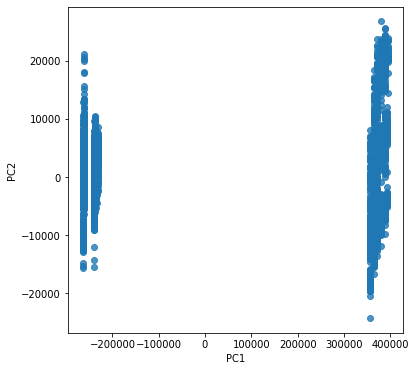

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
import plotly.express as px

In [ ]:
temp_df

,store_id_label,number_of_events,raw_visit_counts,raw_visitor_counts,distance_from_home,median_dwell,<5,5-10,11-20,21-60,...,rolling_sold_max,rolling_sold_min,rolling_sold_std,weekly_avg_sold,avg_sold,selling_trend,state_store_sold_avg,state_sold_avg,store_sold_avg,sold
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-23,0,1,557.260223,450.617100,5690.000000,21.888476,9.011152,109.315985,127.713755,231.275093,...,26976.0,22432.0,1981.00,22432.0,28176.0,-5744.0,28176.0,26256.0,28176.0,22432
2012-01-23,3,1,557.260223,450.617100,5690.000000,21.888476,9.011152,109.315985,127.713755,231.275093,...,13688.0,13168.0,233.25,13432.0,15048.0,-1616.0,15048.0,26256.0,15048.0,13431
2012-01-23,1,1,557.260223,450.617100,5690.000000,21.888476,9.011152,109.315985,127.713755,231.275093,...,18128.0,17168.0,454.25,18128.0,20928.0,-2800.0,20928.0,26256.0,20928.0,18126
2012-01-23,7,1,422.318182,331.522727,10326.875000,21.653409,7.590909,90.431818,97.431818,169.090909,...,12264.0,11544.0,309.00,11944.0,18928.0,-6984.0,18928.0,22192.0,18928.0,11946
2012-01-23,9,1,422.318182,331.522727,10326.875000,21.653409,7.590909,90.431818,97.431818,169.090909,...,30656.0,21248.0,4636.00,21248.0,23536.0,-2288.0,23536.0,22192.0,23536.0,21248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-05-16,0,1,786.498141,620.386617,6106.869403,21.611524,14.375465,162.498141,175.189591,306.130112,...,34592.0,28560.0,2666.00,28560.0,28176.0,384.0,28176.0,26256.0,28176.0,28566
2016-05-16,6,1,1047.154440,785.808880,7970.343023,21.405405,20.847490,243.729730,231.339768,387.498069,...,30176.0,25120.0,2266.00,25120.0,22320.0,2800.0,22320.0,23056.0,22320.0,25126
2016-05-16,4,1,1047.154440,785.808880,7970.343023,21.405405,20.847490,243.729730,231.339768,387.498069,...,25872.0,21664.0,1730.00,21664.0,20480.0,1184.0,20480.0,23056.0,20480.0,21660


In [ ]:
temp_df.columns

Index(['store_id_label', 'number_of_events', 'raw_visit_counts',
       'raw_visitor_counts', 'distance_from_home', 'median_dwell', '<5',
       '5-10', '11-20', '21-60', '61-120', '121-240', '>240',
       'average_visitors_same_day_yj', 'average_visitors_same_week_yj',
       'population', 'employed', 'unemployed', 'unemployment_rate',
       'sold_lag_1', 'sold_lag_4', 'sold_lag_13', 'sold_lag_26', 'sold_lag_52',
       'expanding_sold_mean', 'rolling_sold_mean', 'rolling_sold_max',
       'rolling_sold_min', 'rolling_sold_std', 'weekly_avg_sold', 'avg_sold',
       'selling_trend', 'state_store_sold_avg', 'state_sold_avg',
       'store_sold_avg', 'sold'],
      dtype='object')

In [ ]:
features=['raw_visit_counts','unemployment_rate','rolling_sold_mean','sold']

In [ ]:
t_df=temp_df[features]

In [ ]:
pca.fit(t_df)
feature = pca.transform(t_df)

NameError: ignored

In [ ]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    feature,
    labels=labels,
    color=temp_df['store_id_label']
)
fig.update_traces(diagonal_visible=False)
fig.show()

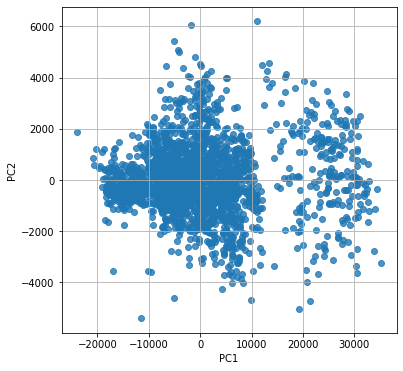

In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [ ]:
explained_variance = pca.explained_variance_ratio_

In [ ]:
explained_variance

array([9.83653318e-01, 1.58865116e-02, 4.60130204e-04, 4.00273063e-08])

In [ ]:
pca.fit(temp_df)
feature = pca.transform(temp_df)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.91681990e-01, 7.20307179e-03, 3.75948834e-04, 2.41350589e-04,
       1.59180765e-04, 8.36544597e-05, 6.07688131e-05, 5.23568640e-05,
       4.34215687e-05, 3.32348066e-05, 2.48546539e-05, 1.89283923e-05,
       1.40688461e-05, 5.63258474e-06, 9.25168023e-07, 4.15089606e-07,
       1.59782427e-07, 2.97881821e-08, 3.76990008e-09, 1.22860265e-09,
       6.09637986e-10, 4.13816651e-10, 2.85767297e-10, 1.88466013e-10,
       1.67782309e-10, 8.56315571e-11, 8.53369895e-12, 7.25620696e-12,
       2.99320038e-12, 2.72593598e-12, 1.20792345e-12, 7.07033381e-13,
       7.42352049e-33, 7.42352049e-33, 7.42352049e-33, 7.42352049e-33])